In [1]:
import gstlearn as gl
import numpy as np
import matplotlib.pyplot as plt

In [22]:
cov = gl.CovDiffusionAdvection()

vel = [0,0]
scaleTime = 0.2
sigma2 = 3
p1 = 1
p2 = 1
scale = 2
ctxt = gl.CovContext()
cova1 = gl.CovAniso.createIsotropic(type=gl.ECov.BESSEL_K,
                                    range = scale, 
                                    param =p1, flagRange= False,
                                    ctxt=ctxt)
#cova2 = gl.CovAniso.createIsotropic(type=gl.ECov.BESSEL_K,
#                                    range = scale, 
#                                    param =p2, 
#                                    flagRange= False,ctxt=ctxt)

cova1 = None
   
cov = gl.CovDiffusionAdvection.create(cova1,cova2,scaleTime,vel,sigma2)
covprod = cov.getSpatialTrace()

In [23]:
cov.getSpatialTrace().getMarkovCoeffs()

(1.0, 2.0, 1.0)

In [24]:
cov.getGlobalCorrec()

0.24989756768264187

### Spatial Trace

In [25]:
mH1 = 50
mH2 = 50
N=2**8
result = np.array(cov.evalCovFFT([mH1,mH2],0,N).getValues()).reshape(N,N)
trace= np.array(covprod.evalCovFFT([mH1,mH2],N).getValues()).reshape(N,N)


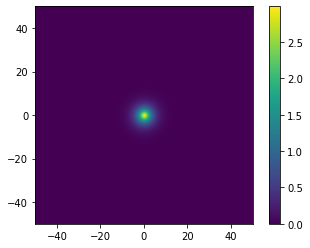

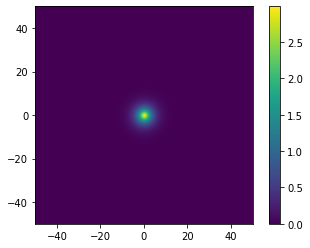

In [26]:
plt.imshow(result,extent = [-mH1,mH1,-mH2,mH2])
plt.colorbar()
plt.show()
plt.imshow(trace,extent = [-mH1,mH1,-mH2,mH2])
plt.colorbar()

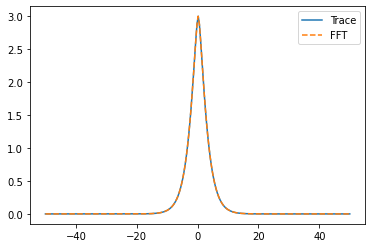

In [27]:
X1 = np.linspace(-mH1,mH1,N) 
X2 = np.linspace(-mH2,mH2,N) 

plt.plot(X1,trace[int(N/2),:],label = "Trace")
plt.plot(X1,result[int(N/2),:],"--",label="FFT")
plt.legend()


In [28]:

N=2**7

ntimes = 40
restime = np.zeros(shape=ntimes)
result = np.zeros(shape = (N*N,ntimes))
times = np.arange(ntimes) * 0.5
for it,time in enumerate(times):
    result[:,it] = np.array(cov.evalCovFFT([mH1,mH2],time,N).getValues())
    restime[it] = result[:,it].reshape(N,N)[int(N/2),int(N/2)]

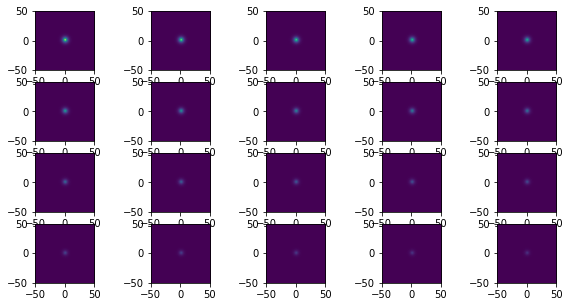

In [29]:
fig, axs = plt.subplots(nrows=4,ncols=5, figsize=(10,5))
k = 0
for i in range(4) : 
    for j in range(5):
        pt = axs[i,j].imshow(result[:,k].reshape(N,N),origin = "lower",extent = [-mH1,mH1,-mH2,mH2])
        pt.set_clim([result.min(),result.max()])
        k+=1


### Temporal covariance

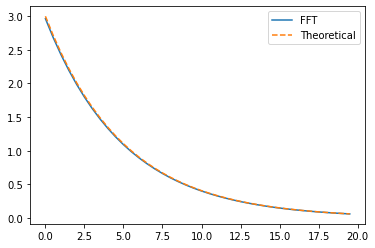

In [30]:
plt.plot(times,restime,label = "FFT")
if cova1 is None :
    plt.plot(times,sigma2 * np.exp(-times*scaleTime),"--",label = "Theoretical")

#plt.ylim((0,restime.max()))
plt.legend()